**3**

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              12587008  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 26,232,842
Trainable params: 26,232,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2500/2500 [==============================] - 27s 11ms/step - loss: 1.9481 - acc: 0.2875 - val_loss: 1.7881 - val_acc: 0.3453
Epoch 2/50
2500/2500 [=================

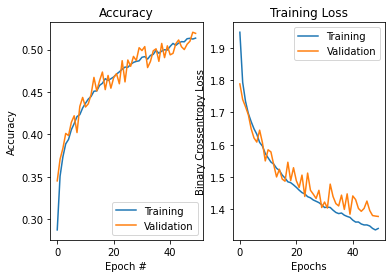

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from random import randint


def plot_im(images):
  plt.figure(figsize=[20,20])
  for i in range(1,2):
    plt.subplot(2,5,i)
    plt.imshow(images[0,:,:],cmap='gray')
  plt.show()

def plot_curve(acc_train,loss_train,acc_valid,loss_valid):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,acc_train,epochs,acc_valid)
  plt.xlabel('Epoch #')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training','Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train,epochs,loss_valid)
  plt.xlabel('Epochs')
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('Training Loss')
  plt.legend(['Training','Validation'])
  plt.show()

(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
#Returns each specific label in the dataset once
classes=np.unique(y_train)

#Shuffling dataset 
t_num=x_train.shape[0]
t_ind=np.arange(0,t_num)
t_shuf=np.random.permutation(t_ind)
tt=x_train[t_shuf,:,:,:]
ty=y_train[t_shuf]
#(a)selecting 20% of the training subjects for validation purposes
x_valid=tt[0:int(.2*t_num),:,:]
y_valid=ty[0:int(.2*t_num)]
#Remaining data
x_train=x_train[int(.2*t_num):,:,:]
y_train=y_train[int(.2*t_num):]

#(b)Image Scaling
x_train=x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255.0
x_valid /= 255.0
x_test /= 255.0

#(c)Flattening the images to a single vector
x_train_f=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_valid_f=np.reshape(x_valid,(x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3]))
x_test_f=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

#(d)Converting classes to binary class matrices(Confusion matrix)
y_train_c=to_categorical(y_train,len(classes))
y_valid_c=to_categorical(y_valid,len(classes))
y_test_c=to_categorical(y_test,len(classes))


#(f)Building the model
####Look into adding dropout layers/ regularization
mod_a=Sequential()
mod_a.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
mod_a.add(Dense(units=4096,activation='relu'))
mod_a.add(Dense(units=1024,activation='relu'))
mod_a.add(Dense(len(classes),activation='softmax'))

#Compiling the model
mod_a.compile(loss='categorical_crossentropy',optimizer=Adam(lr=.001),metrics=['acc'])

#(g) Total number of parameters: 26,232,842 (Holy Cow!)
mod_a.summary()

#COME BACK AND FIX TO SAVE YOUR BEST RUNS!!!!
save_path='/content/drive/My Drive/mod_a.h5'
callbacks_save=ModelCheckpoint(save_path,monitor='val+loss',verbose=0,save_best_only=True, period=1)

#Training
history=mod_a.fit(x_train_f,y_train_c,
                  batch_size=16,epochs=50,verbose=1,
                  validation_data=(x_valid_f,y_valid_c),
                  callable=[callbacks_save])

#Plotting loss and accuracy
train_acc_curve=np.array(history.history['acc'])
train_acc_loss=np.array(history.history['loss'])
valid_acc_curve=np.array(history.history['val_acc'])
valid_acc_loss=np.array(history.history['val_loss'])
plot_curve(train_acc_curve,train_acc_loss,valid_acc_curve,valid_acc_loss)
                  

#plot_im(x_valid)
#print(x_train_f.shape)
#print(y_train_c.shape)


**Image classification with a FC Network**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dropout_3 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 4096)              12587008  
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 26,232,842
Trainable params: 26,232,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2500/2500 [==============================] - 16s 7ms/step - loss: 1.8280 - acc: 0.3467 - val_loss

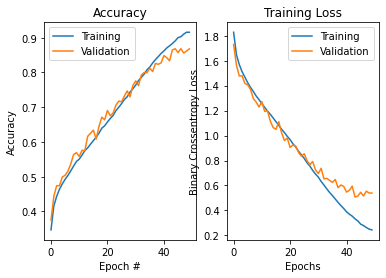

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from random import randint


def plot_im(images):
  plt.figure(figsize=[20,20])
  for i in range(1,2):
    plt.subplot(2,5,i)
    plt.imshow(images[0,:,:],cmap='gray')
  plt.show()

def plot_curve(acc_train,loss_train,acc_valid,loss_valid):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,acc_train,epochs,acc_valid)
  plt.xlabel('Epoch #')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training','Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train,epochs,loss_valid)
  plt.xlabel('Epochs')
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('Training Loss')
  plt.legend(['Training','Validation'])
  plt.show()

(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
classes=np.unique(y_train)

#Shuffling dataset 
t_num=x_train.shape[0]
t_ind=np.arange(0,t_num)
t_shuf=np.random.permutation(t_ind)
tt=x_train[t_shuf,:,:,:]
ty=y_train[t_shuf]
#selecting 20% of the training subjects for validation purposes
x_valid=tt[0:int(.2*t_num),:,:]
y_valid=ty[0:int(.2*t_num)]
#Remaining data
x_train=x_train[int(.2*t_num):,:,:]
y_train=y_train[int(.2*t_num):]

x_train=x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255.0
x_valid /= 255.0
x_test /= 255.0

x_train_f=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_valid_f=np.reshape(x_valid,(x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3]))
x_test_f=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

y_train_c=to_categorical(y_train,len(classes))
y_valid_c=to_categorical(y_valid,len(classes))
y_test_c=to_categorical(y_test,len(classes))


#(h) I propose that adding a 20% dropout layer will help to somewhat dampen the 
#overfitting shown in the results of the previous model. I did a bit of research 
#and it was suggested that momentum be introduced to the optimizer and that SGD 
#be used as opposed to Adam, which I never thought I'd hear.

#(i)
mod_a=Sequential()
mod_a.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
mod_a.add(Dropout(0.2))
mod_a.add(Dense(units=4096,activation='relu'))
mod_a.add(Dense(units=1024,activation='relu'))
mod_a.add(Dense(len(classes),activation='softmax'))


mod_a.compile(loss='categorical_crossentropy',optimizer=SGD(lr=.001,momentum=.9),metrics=['acc'])

mod_a.summary()

save_path='/content/drive/My Drive/mod_a.h5'
callbacks_save=ModelCheckpoint(save_path,monitor='val+loss',verbose=0,save_best_only=True, period=1)

history=mod_a.fit(x_train_f,y_train_c,
                  batch_size=16,epochs=50,verbose=1,
                  validation_data=(x_valid_f,y_valid_c),
                  callable=[callbacks_save])


train_acc_curve=np.array(history.history['acc'])
train_acc_loss=np.array(history.history['loss'])
valid_acc_curve=np.array(history.history['val_acc'])
valid_acc_loss=np.array(history.history['val_loss'])
plot_curve(train_acc_curve,train_acc_loss,valid_acc_curve,valid_acc_loss)
              

**Image classification with a Convolutional Neural Network**

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/50
2500/2500 [==============================] - 14s 6ms/step - loss: 6.0341 - acc: 0.3636 - val_loss: 3.5579 - val_acc: 0.4596
Epoch 2/50
2500/2500 [==============================] - 13s 5ms/step - loss: 3.1807 - acc: 0.4669 - val_loss: 2.9866 - val_acc: 0.5221
Epoch 3/50
2500/2500 [==============================] - 13s 5ms/step - loss: 2.8810 - acc: 0.5155 - val_loss: 2.8357 - val_acc: 0.5497
Epoch 4/50
2500/2500 [==============================] - 13s 5ms/step - loss: 2.7282 - acc: 0.5523 - val_loss: 2.5043 - val_acc: 0.5950
Epoch 5/50
2500/2500 [==============================] - 15s 6ms/step - loss: 2.6410 - acc: 0.5807 - val_loss: 2.4581 - val_acc: 0.6453
Epoch 6/50
2500/2500 [==============================] - 13s 5ms/step - loss: 2.5353 - acc: 0.6076 - val_loss: 2.1133 - val_acc: 0.6551
Epoch 7/50
2500/2500 [==============================] - 13s 5ms/step - loss: 2.5126 - acc: 0.6263 - val_loss: 2.0680 - val_

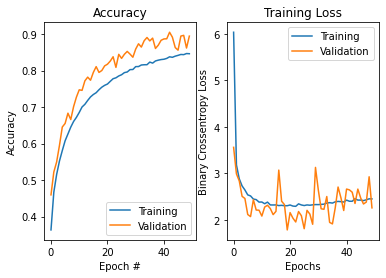

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
#from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

def plot_curve(acc_train,loss_train,acc_valid,loss_valid):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,acc_train,epochs,acc_valid)
  plt.xlabel('Epoch #')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training','Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train,epochs,loss_valid)
  plt.xlabel('Epochs')
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('Training Loss')
  plt.legend(['Training','Validation'])
  plt.show()

(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
classes=np.arange(10)

#Shuffling dataset 
t_num=x_train.shape[0]
t_ind=np.arange(0,t_num)
t_shuf=np.random.permutation(t_ind)
tt=x_train[t_shuf,:,:,:]
ty=y_train[t_shuf]
#(a)selecting 20% of the training subjects for validation purposes
x_valid=tt[0:int(.2*t_num),:,:]
y_valid=ty[0:int(.2*t_num)]
#Remaining data
x_train=x_train[int(.2*t_num):,:,:]
y_train=y_train[int(.2*t_num):]

#(b)Image Scaling
x_train=x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255.0
x_valid /= 255.0
x_test /= 255.0

#(c)Converting classes to binary class matrices
y_train_c=to_categorical(y_train,len(classes))
y_valid_c=to_categorical(y_valid,len(classes))
y_test_c=to_categorical(y_test,len(classes))

#(d)Setting up a Convolutional Neural Network model
mod_b=Sequential()
#(Conv2D(number of layers,size of filter(*No need to specify depth*), 
#padding specification,input shape(*Start from 1*)))
mod_b.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:],
                activity_regularizer=l1(.02)))
mod_b.add(Activation('relu'))
mod_b.add(Conv2D(32,(3,3)))
mod_b.add(Activation('relu'))
mod_b.add(MaxPooling2D(pool_size=(2,2)))

mod_b.add(Conv2D(64,(3,3),padding='same'))
mod_b.add(Activation('relu'))
mod_b.add(Conv2D(64,(3,3)))
mod_b.add(Activation('relu'))
mod_b.add(MaxPooling2D(pool_size=(2,2)))

mod_b.add(Flatten())
mod_b.add(Dense(units=512,activation='relu'))
mod_b.add(Dropout(.5))
mod_b.add(Dense(units=len(classes), activation='softmax'))


#(e)Compiling the model
mod_b.compile(loss='categorical_crossentropy',optimizer=Adam(lr=.001),metrics=['acc'])

#Initializing model checkpoint
save_path='/content/drive/My Drive/Colab Notebooks/Assig5.h5'
callbacks_save= tf.keras.callbacks.ModelCheckpoint(save_path,monitor='val_loss',verbose=0,save_best_only=True,save_freq='epoch')

#Training
history=mod_b.fit(x_train,y_train_c,
                 batch_size=16,epochs=50,verbose=1,
                  validation_data=(x_valid,y_valid_c),
                  callbacks=[callbacks_save])

#(f)
#Total number of network parameters: 1,250,858
#There are 24,981,984 more parameters in the previous problem. This disparity
#is due to the fact that FC Neural Networks do not scale as well for images 
#of this size compared to the CNN.
mod_b.summary()

#(g) Overfitting. The model is learning all of the noise of the training data.

#Loads best model
mod_b=load_model(save_path)

#(i) Original validation loss and accuracy: 2.61 & 89%
#    New validation loss and accuracy: 2.2 & 90%
#This shows that the new model 'Sequential_1' has better loss, but 
#The accuracy is about the same(However the graph does 
#look better). Saving the model saves the parameters before
#overfitting/underfitting occurs, yeilding a model superior to the original

#Evaluating model on held out samples
score=mod_b.evaluate(x_test,y_test_c)
print('Total loss for testing set:',score[0])
print('Accuracy of testing set:',score[1])

#(j)
train_acc_curve=np.array(history.history['acc'])
train_acc_loss=np.array(history.history['loss'])
valid_acc_curve=np.array(history.history['val_acc'])
valid_acc_loss=np.array(history.history['val_loss'])
plot_curve(train_acc_curve,train_acc_loss,valid_acc_curve,valid_acc_loss)


